# Video Game Sales Data Analysis

### **Project Goal**
The goal of this project is to explore and analyze a dataset of video game sales to uncover key insights. We will focus on identifying trends in sales over time, examining which genres and platforms are most popular, and investigating the performance of top publishers.

### **Dataset**
The dataset used is the "Video Game Sales" dataset from Kaggle, containing sales data for over 16,500 games.

In [6]:
import pandas as pd
import numpy as np

In [7]:
# Load the dataset.
df = pd.read_csv('../data/raw/vgsales.csv')

## 1. Data Exploration and Initial Inspection
In this section, we will load the dataset, perform an initial inspection to understand its structure, and handle any missing or inconsistent data.

In [8]:
# Display the first five rows in the DataFrame
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [9]:
# Get a summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [10]:
# Generate descriptive statistics for numerical columns
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [11]:
# Create a copy of the DataFrame to work with
df_cleaned = df.copy()

In [12]:
# Remove the rows with missing values in "Year" or "Publisher"
df_cleaned = df_cleaned.dropna(subset=['Year', 'Publisher'])

In [13]:
# Convert the "Year" column from a float to an integer
df_cleaned['Year'] = df_cleaned['Year'].astype('int64')

In [20]:
# Save the cleaned DataFrame to the processed data folder
df_cleaned.to_csv('../data/processed/vgsales_cleaned.csv', index=False)

In [24]:
# Reload the processed data to ensure it works correctly
df_processed = pd.read_csv('../data/processed/vgsales_cleaned.csv')

In [25]:
# Show the information of the cleaned DataFrame
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16291 entries, 0 to 16290
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  int64  
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


## 2. Data Cleaning and Preprocessing

Based on our initial inspection, we identified two main issues:
1.  The `Year` and `Publisher` columns had a small number of missing values.
2.  The `Year` column was incorrectly stored as a `float` data type.

To address these issues, we took the following steps:
-   Removed rows with missing values in `Year` and `Publisher`.
-   Converted the `Year` column to an integer data type to ensure it is in the correct format for future analysis.

Our cleaned DataFrame, `df_processed`, now has no missing values and the correct data types.

## 3. Exploratory Data Analysis (EDA)
With our data now clean and ready, we can begin to explore it for interesting trends and insights. In this section, we will use descriptive statistics and basic analysis to understand key aspects of the video game market.

In [26]:
# What are the most popular video game genres?
print("Most Popular Genres:\n", df_processed['Genre'].value_counts().head(5))

Most Popular Genres:
 Genre
Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Name: count, dtype: int64


In [27]:
# What are the most popular platforms?
print("Most Popular Platforms:\n", df_processed['Platform'].value_counts().head(5))

Most Popular Platforms:
 Platform
DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
Name: count, dtype: int64


In [28]:
# Get descriptive statistics for the sales columns
print("Descriptive Statistics for Sales:")
print(df_processed[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']].describe())

Descriptive Statistics for Sales:
           NA_Sales      EU_Sales      JP_Sales  Global_Sales
count  16291.000000  16291.000000  16291.000000  16291.000000
mean       0.265647      0.147731      0.078833      0.540910
std        0.822432      0.509303      0.311879      1.567345
min        0.000000      0.000000      0.000000      0.010000
25%        0.000000      0.000000      0.000000      0.060000
50%        0.080000      0.020000      0.000000      0.170000
75%        0.240000      0.110000      0.040000      0.480000
max       41.490000     29.020000     10.220000     82.740000


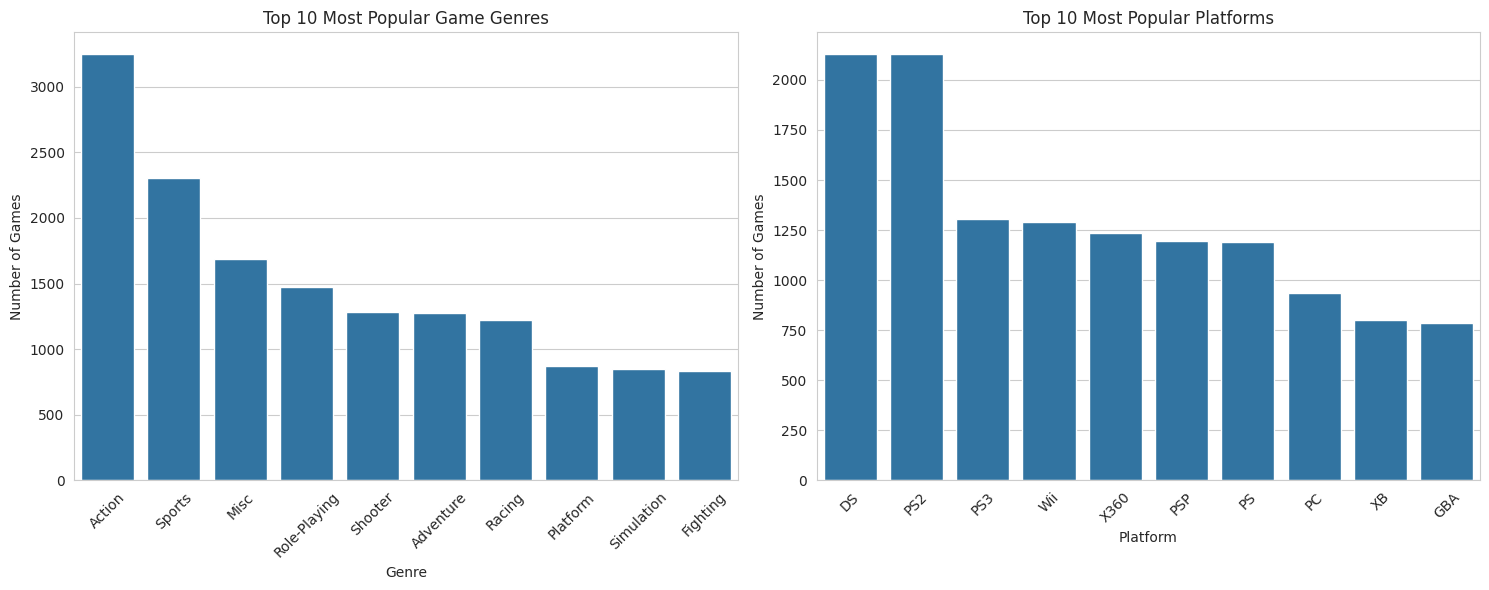

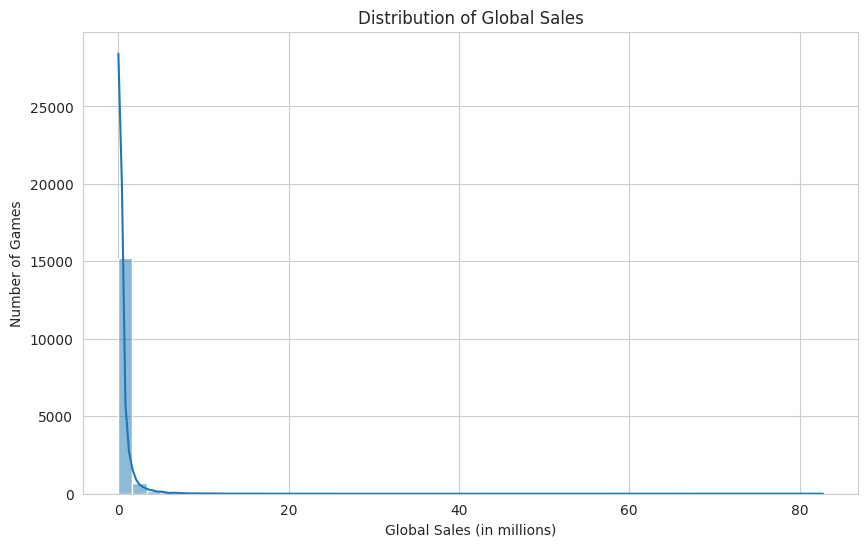

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for the plots
sns.set_style("whitegrid")

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Top 10 Genres
top_genres = df_processed['Genre'].value_counts().head(10)
sns.barplot(x=top_genres.index, y=top_genres.values, ax=axes[0])
axes[0].set_title('Top 10 Most Popular Game Genres')
axes[0].set_xlabel('Genre')
axes[0].set_ylabel('Number of Games')
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: Top 10 Platforms
top_platforms = df_processed['Platform'].value_counts().head(10)
sns.barplot(x=top_platforms.index, y=top_platforms.values, ax=axes[1])
axes[1].set_title('Top 10 Most Popular Platforms')
axes[1].set_xlabel('Platform')
axes[1].set_ylabel('Number of Games')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Create a histogram for Global Sales to visualize the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_processed['Global_Sales'], bins=50, kde=True)
plt.title('Distribution of Global Sales')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Number of Games')
plt.show()

## 4. Conclusion

This exploratory analysis of the video game sales dataset has revealed several key characteristics of the market. Our findings indicate a highly concentrated industry where success is dominated by a select few. Both the **Action** and **Sports** genres and the **DS** and **PS2** platforms lead in the number of games produced. Crucially, the sales data is heavily skewed: while the majority of games sell very few copies, a small number of blockbuster titles generate a disproportionately large share of global sales. This suggests that the market is driven by major hit releases rather than a broad base of consistent performers. Further analysis could investigate the relationship between a game's rating, publisher, and its potential to become one of these top-selling blockbusters.